In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dropout, BatchNormalization, Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/siot/centrality_measures_data.csv")


In [ ]:
data

,Node,Degree Centrality,Closeness Centrality,Betweenness Centrality,PageRank,Betweenness Centrality (alternative)
0,0,0.003701,0.348869,0.006033,0.000402,0.006033
1,1,0.001234,0.310634,0.000371,0.000147,0.000371
2,2,0.002560,0.331673,0.001703,0.000265,0.001703
3,3,0.007987,0.351358,0.015117,0.000991,0.015117
4,4,0.000833,0.286381,0.000260,0.000108,0.000260
...,...,...,...,...,...,...
32423,34081,0.000031,0.222998,0.000000,0.000009,0.000000
32424,34082,0.000031,0.222998,0.000000,0.000009,0.000000
32425,34083,0.000031,0.222347,0.000000,0.000009,0.000000
32426,34084,0.000031,0.222347,0.000000,0.000009,0.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32428 entries, 0 to 32427
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Node                                  32428 non-null  int64  
 1   Degree Centrality                     32428 non-null  float64
 2   Closeness Centrality                  32428 non-null  float64
 3   Betweenness Centrality                32428 non-null  float64
 4   PageRank                              32428 non-null  float64
 5   Betweenness Centrality (alternative)  32428 non-null  float64
 6   Label                                 32428 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.7 MB


In [ ]:

data['Label'] = (data['Closeness Centrality'] > 0.3).astype(int)


In [ ]:
#  to an existing Excel file
data.to_csv("/content/drive/MyDrive/siot/siot_file.csv", index=False, mode='a', header=False)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32428 entries, 0 to 32427
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Node                                  32428 non-null  int64  
 1   Degree Centrality                     32428 non-null  float64
 2   Closeness Centrality                  32428 non-null  float64
 3   Betweenness Centrality                32428 non-null  float64
 4   PageRank                              32428 non-null  float64
 5   Betweenness Centrality (alternative)  32428 non-null  float64
 6   Label                                 32428 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.7 MB


In [ ]:
data.Label.value_counts()

0    31262
1     1166
Name: Label, dtype: int64

In [ ]:

X = data.drop(['Label'], axis=1)
y = data['Label']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense,LSTM
from keras.utils import to_categorical

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for GRU
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped.reshape(-1, X_train_reshaped.shape[-1])).reshape(X_train_reshaped.shape)
X_test_scaled = scaler.transform(X_test_reshaped.reshape(-1, X_test_reshaped.shape[-1])).reshape(X_test_reshaped.shape)



# Build a model with both LSTM and GRU layers
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train_scaled.shape[1],  X_train_scaled.shape[2]), return_sequences=True))
model.add(GRU(units=128, input_shape=(X_train_scaled.shape[1],  X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])






In [ ]:
# Train the model
history_com = model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_split=0.1)



Epoch 1/5
730/730 [==============================] - 14s 14ms/step - loss: 0.0635 - accuracy: 0.9831 - val_loss: 0.0150 - val_accuracy: 0.9934
Epoch 2/5
730/730 [==============================] - 8s 11ms/step - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.0223 - val_accuracy: 0.9881
Epoch 3/5
730/730 [==============================] - 6s 8ms/step - loss: 0.0106 - accuracy: 0.9958 - val_loss: 0.0111 - val_accuracy: 0.9950
Epoch 4/5
730/730 [==============================] - 5s 7ms/step - loss: 0.0089 - accuracy: 0.9967 - val_loss: 0.0392 - val_accuracy: 0.9846
Epoch 5/5
730/730 [==============================] - 7s 9ms/step - loss: 0.0081 - accuracy: 0.9966 - val_loss: 0.0074 - val_accuracy: 0.9965


In [ ]:

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)

203/203 [==============================] - 2s 4ms/step


In [ ]:
accu=accuracy_score(y_test,y_pred.round())
print("Accuracy Score:" )
print(accu)

Accuracy Score:
0.9972247918593895


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred.round())
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6250   17]
 [   1  218]]


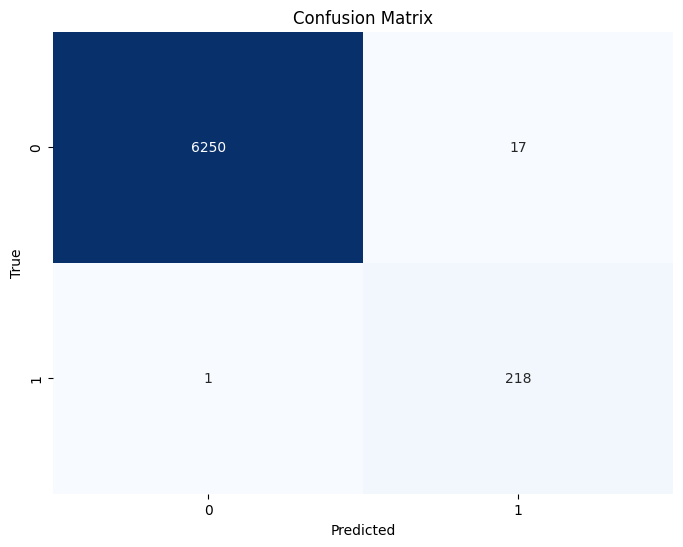

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
classif = classification_report(y_test, y_pred.round())
print("Classification report:")
print(classif)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6267
           1       0.93      1.00      0.96       219

    accuracy                           1.00      6486
   macro avg       0.96      1.00      0.98      6486
weighted avg       1.00      1.00      1.00      6486



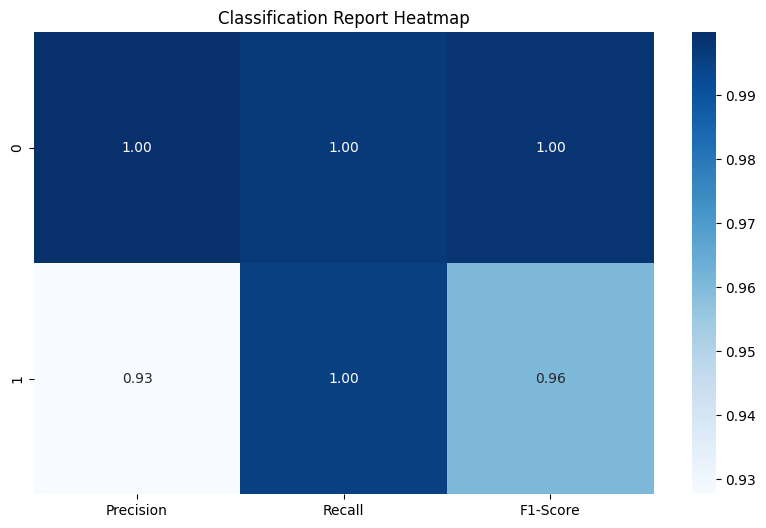

In [ ]:
# Plotting a heatmap for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred.round(), output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, and F1-score for each class
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'], class_report[class_name]['f1-score']] for class_name in class_names]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'], yticklabels=class_names, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

AUC: 1.00


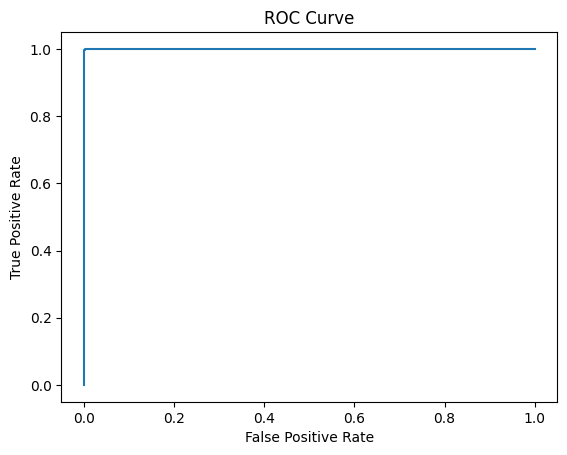

In [ ]:
# Calculate the ROC Precision, Recall, and F1-Score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred.round())
print('AUC: %.2f' % auc)

# Calculate the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# plot the roc curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

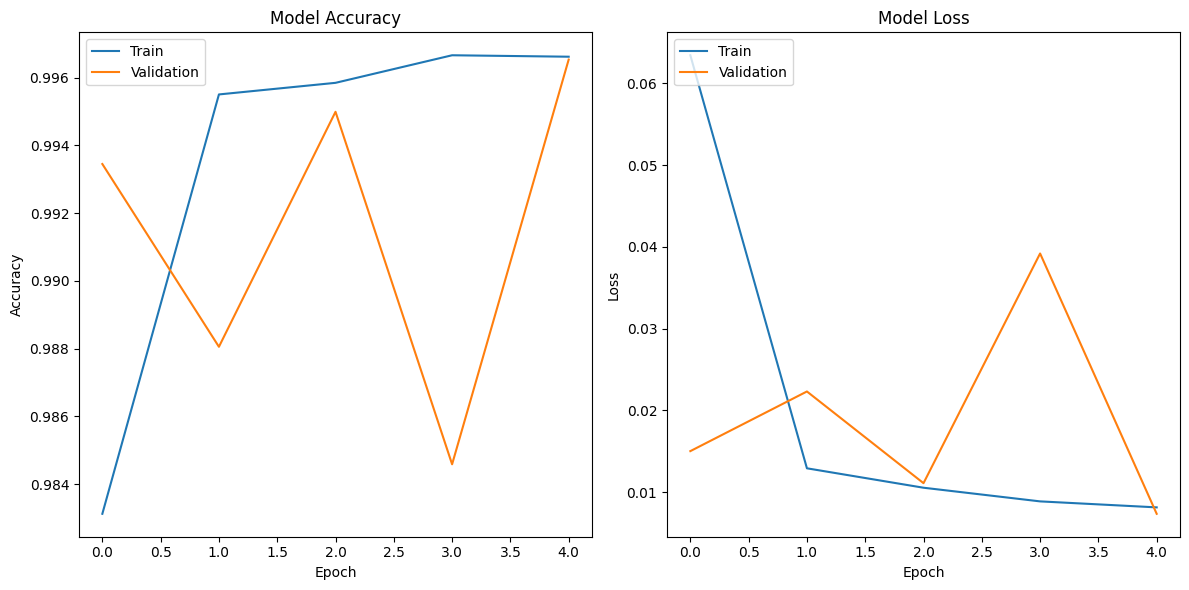

In [ ]:
import matplotlib.pyplot as plt

# Train the model
#history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_com.history['accuracy'])
plt.plot(history_com.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_com.history['loss'])
plt.plot(history_com.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
